# Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from scipy import stats
import statsmodels.api as sm

In [2]:
#load data 
with zipfile.ZipFile('concrete+compressive+strength.zip') as z:
    with z.open('Concrete_Data.xls') as f:
        data = pd.read_excel(f)

In [3]:
#get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [10]:
#describe data
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [11]:
data.sample(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
141,425.00,106.30,0.00,153.50,16.50,852.1,887.10,56,64.300532
686,305.30,203.50,0.00,203.50,0.00,965.4,631.00,3,14.143911
447,178.03,129.80,118.60,179.94,3.57,1007.3,746.80,56,48.587374
808,252.00,0.00,0.00,186.00,0.00,1111.0,784.00,7,11.465986
533,289.00,0.00,0.00,192.00,0.00,913.2,895.30,3,11.654902
107,323.70,282.80,0.00,183.80,10.30,942.7,659.90,7,49.800851
908,313.00,145.00,0.00,127.00,8.00,1000.0,822.00,28,44.519465
400,250.00,180.00,95.00,159.00,9.45,860.0,800.00,28,67.865123
66,139.60,209.40,0.00,192.00,0.00,1047.0,806.90,360,44.698040
359,218.23,54.64,123.78,140.75,11.91,1075.7,792.67,3,27.420461


In [12]:
#get unique values per
data.nunique()

Cement (component 1)(kg in a m^3 mixture)                280
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    187
Fly Ash (component 3)(kg in a m^3 mixture)               163
Water  (component 4)(kg in a m^3 mixture)                205
Superplasticizer (component 5)(kg in a m^3 mixture)      155
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     284
Fine Aggregate (component 7)(kg in a m^3 mixture)        304
Age (day)                                                 14
Concrete compressive strength(MPa, megapascals)          938
dtype: int64

In [15]:
#get number of nulls
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [18]:
#check for duplicates
data.duplicated().sum()

25

In [3]:
#remove duplicates
data = data.drop_duplicates()

In [20]:
#check
data.duplicated().sum()

0

In [21]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
#rename some of the column names
data.columns = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age (Days)', 'Compressive_Strength (MPa)']

# Boxplots and Histograms

In [5]:
#function to plot Histogram
def make_histogram(dataframe, num_rows, num_cols, fig_size=tuple):
    columns = list(dataframe.columns) #get input columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=fig_size) #declare size
    # Plot histograms for each feature
    for i, col in enumerate(columns):
        row, subplot_col = divmod(i, num_cols)
        axs[row, subplot_col].hist(dataframe[col], color='skyblue', edgecolor='black')
        axs[row, subplot_col].set_title(columns[i])
        axs[row, subplot_col].set_xlabel('Value')
        axs[row, subplot_col].set_ylabel('Frequency')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


def make_boxplots(dataframe, num_rows, num_cols, fig_size=tuple):
    columns = list(dataframe.columns) #get input columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=fig_size) #declare size
    # Plot histograms for each feature
    for i, col in enumerate(columns):
        row, subplot_col = divmod(i, num_cols)
        axs[row, subplot_col].boxplot(dataframe[col])
        axs[row, subplot_col].set_title(columns[i])
        axs[row, subplot_col].set_ylabel('Value')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()
     


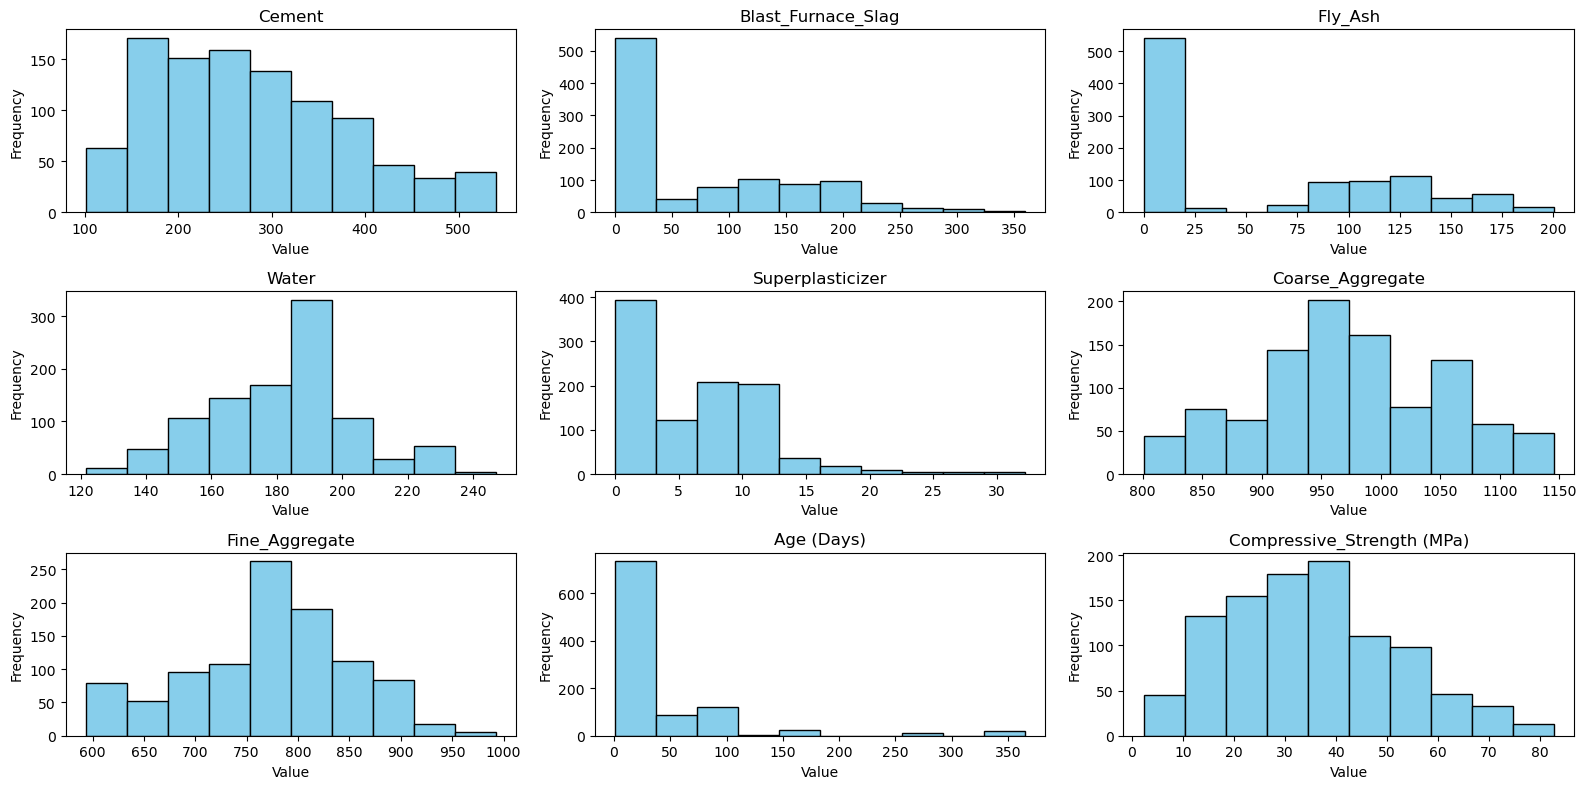

In [26]:
#plot histograms
make_histogram(data, 3, 3, (16, 8))

Let's perform a test to quantify normality of our data. Will use Shapiro Wilk and Q-Q plots

Tests:
- Ho: The data is normally distributed
- Ha: The data is not normally distributed

In [6]:
# function to test for normal distribution
def test_normality(dataframe, feature, alpha):
    result = stats.shapiro(dataframe[feature])
    if result.pvalue < alpha:
        print("The p-value is less than the alpha; reject Ho.")
        print("ShapiroResult (statistic={}, pvalue={})".format(result.statistic, result.pvalue))
    else:
        print("The p-value is greater than the alpha; failed to reject Ho.")
        print("ShapiroResult (statistic={}, pvalue={})".format(result.statistic, result.pvalue))

def make_qq_plots(dataframe, feature):
   # Calculate quartiles for the specified feature
    quartiles = np.percentile(dataframe[feature], [25, 50, 75, 100])

    # Create a normal distribution with the same number of data points
    normal_data = np.random.normal(size=len(dataframe[feature]))

    # Sort both datasets
    data_sorted = np.sort(dataframe[feature])
    normal_sorted = np.sort(normal_data)

    # Create the customized Q-Q plot
    plt.figure(figsize=(8, 6))
    plt.scatter(normal_sorted, data_sorted, color='b', alpha=0.6, label='Data')
    plt.plot([normal_sorted.min(), normal_sorted.max()], [data_sorted.min(), data_sorted.max()], color='r', label='45-degree line')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'Q-Q Plot for {feature}')
    plt.grid(True)
    plt.legend()
    plt.show()

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.9552755355834961, pvalue=5.99907776170408e-17)


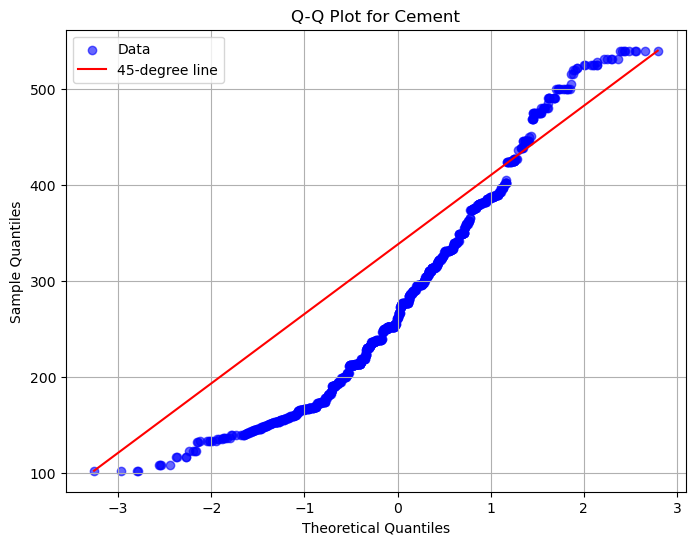

In [23]:
#test for Cement
test_normality(data, 'Cement', alpha=0.05)

#make qq plot for cement
make_qq_plots(data, 'Cement')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.8046935796737671, pvalue=3.923869938021876e-33)


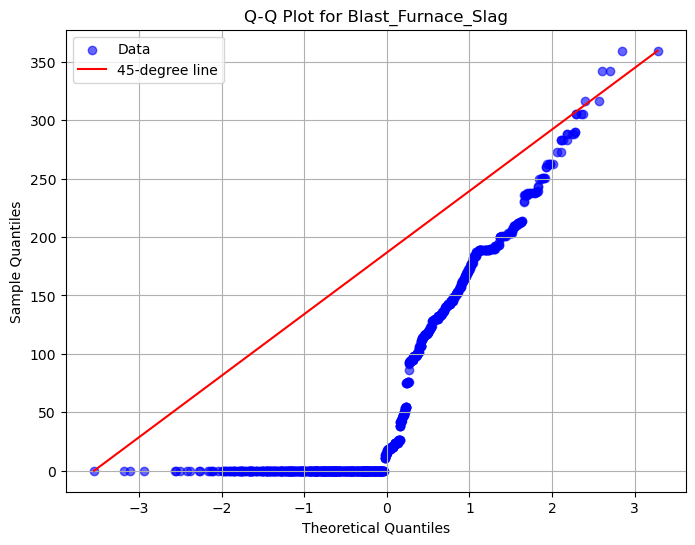

In [24]:
#normality test for blast furance slag
test_normality(data, 'Blast_Furnace_Slag', alpha=0.05)

# qq plot
make_qq_plots(data, 'Blast_Furnace_Slag')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.7687453031539917, pvalue=2.3548934321468426e-35)


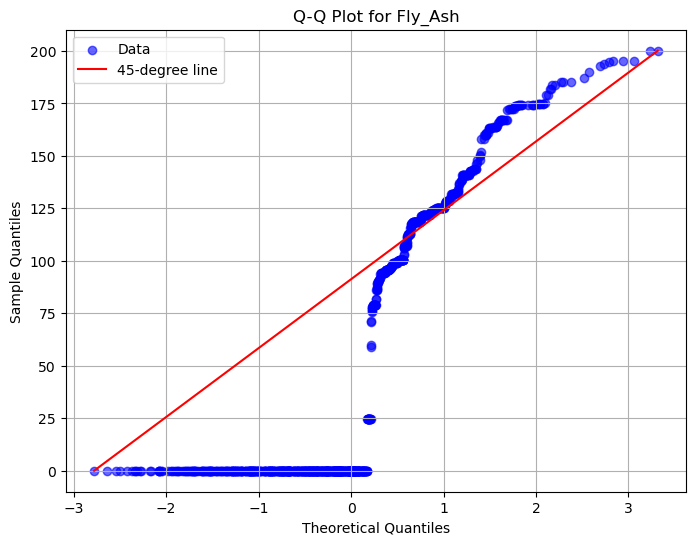

In [25]:
#fly ash
test_normality(data, 'Fly_Ash', 0.05)

make_qq_plots(data, 'Fly_Ash')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.9797188639640808, pvalue=1.2718855135762652e-10)


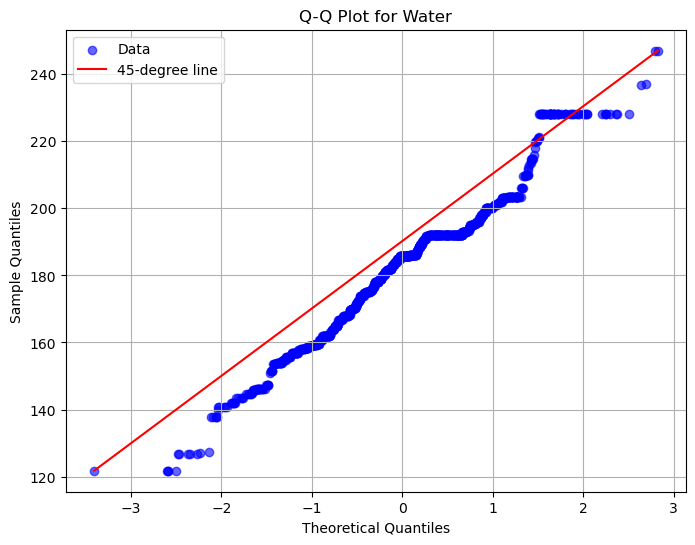

In [26]:
#water
test_normality(data, 'Water', 0.05)

make_qq_plots(data, 'Water')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.8586107492446899, pvalue=4.282330208248985e-29)


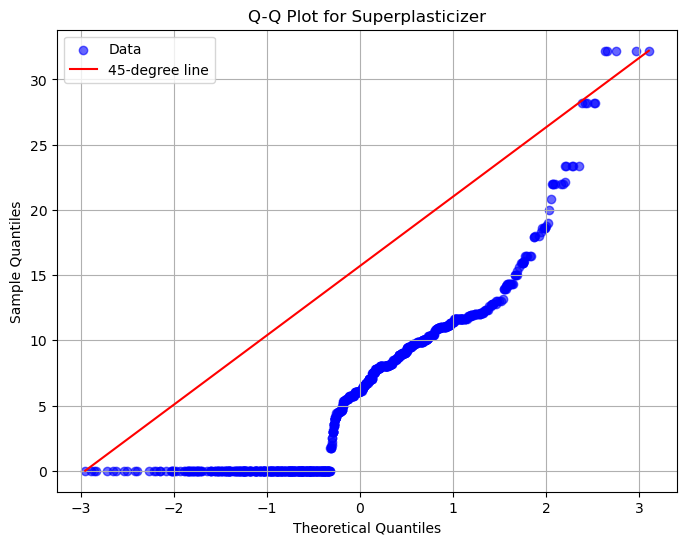

In [27]:
#superplasticizer
test_normality(data, 'Superplasticizer', 0.05)

make_qq_plots(data, 'Superplasticizer')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.9833498597145081, pvalue=2.67865019054625e-09)


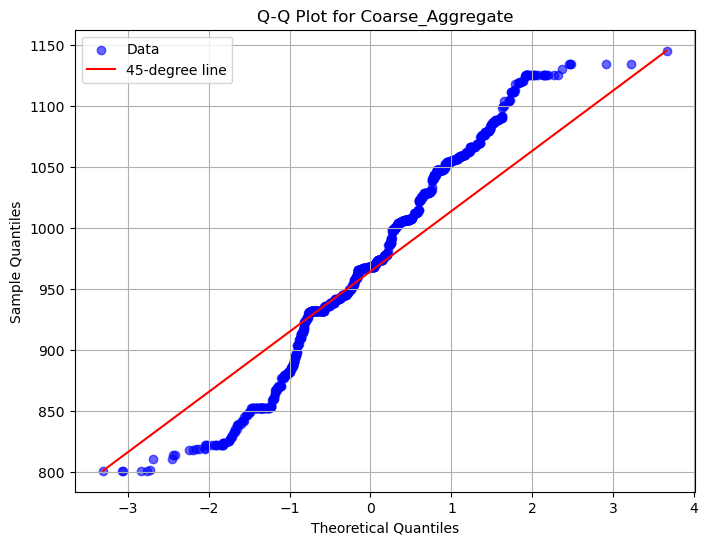

In [28]:
#coarse aggregate
test_normality(data, 'Coarse_Aggregate', 0.05)

make_qq_plots(data, 'Coarse_Aggregate')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.9808975458145142, pvalue=3.2872868316324855e-10)


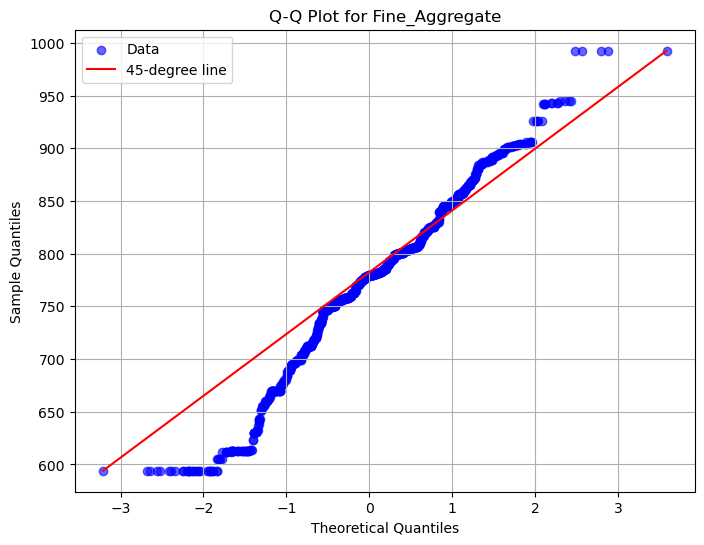

In [29]:
#fine aggregate
test_normality(data, 'Fine_Aggregate', 0.05)

make_qq_plots(data, 'Fine_Aggregate')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.5884941816329956, pvalue=1.6815581571897805e-43)


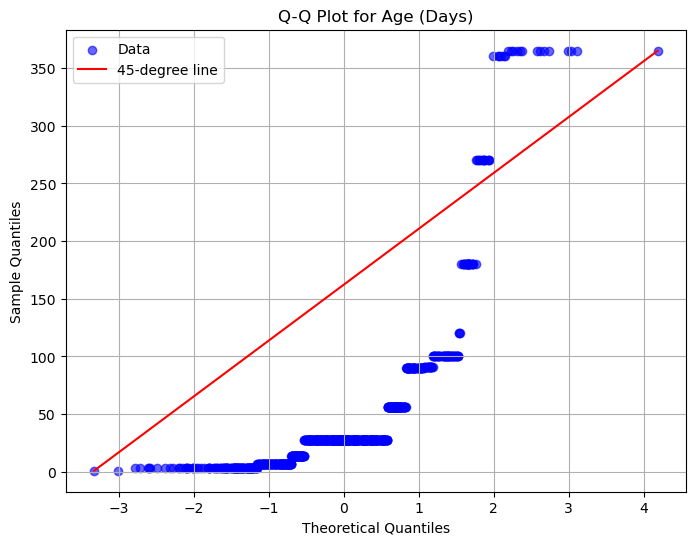

In [30]:
#age
test_normality(data, 'Age (Days)', 0.05)

make_qq_plots(data, 'Age (Days)')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.9817427396774292, pvalue=6.642555949731843e-10)


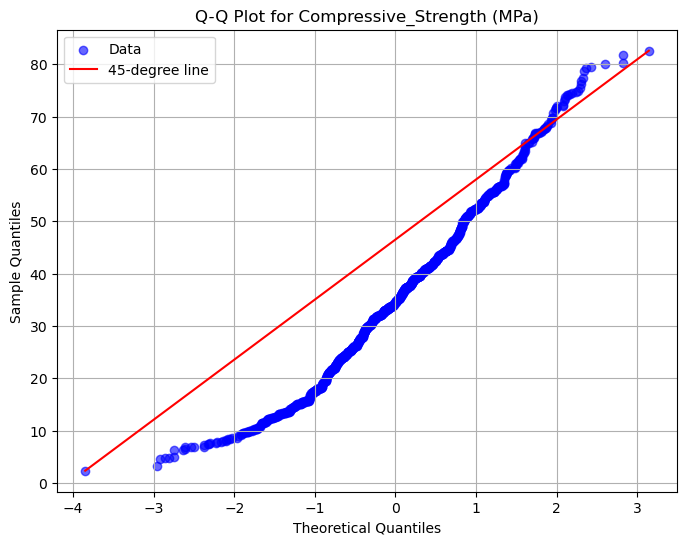

In [31]:
#compressive strength
test_normality(data, 'Compressive_Strength (MPa)', 0.05)

make_qq_plots(data, 'Compressive_Strength (MPa)')

So the Shapiro Wilk test indicates the data is not normally distributed, but does indicate the data is near normal for quite a few features. Intresting indeed, may have to explore other tests like anderson darling in later versions. For now, moving on though.

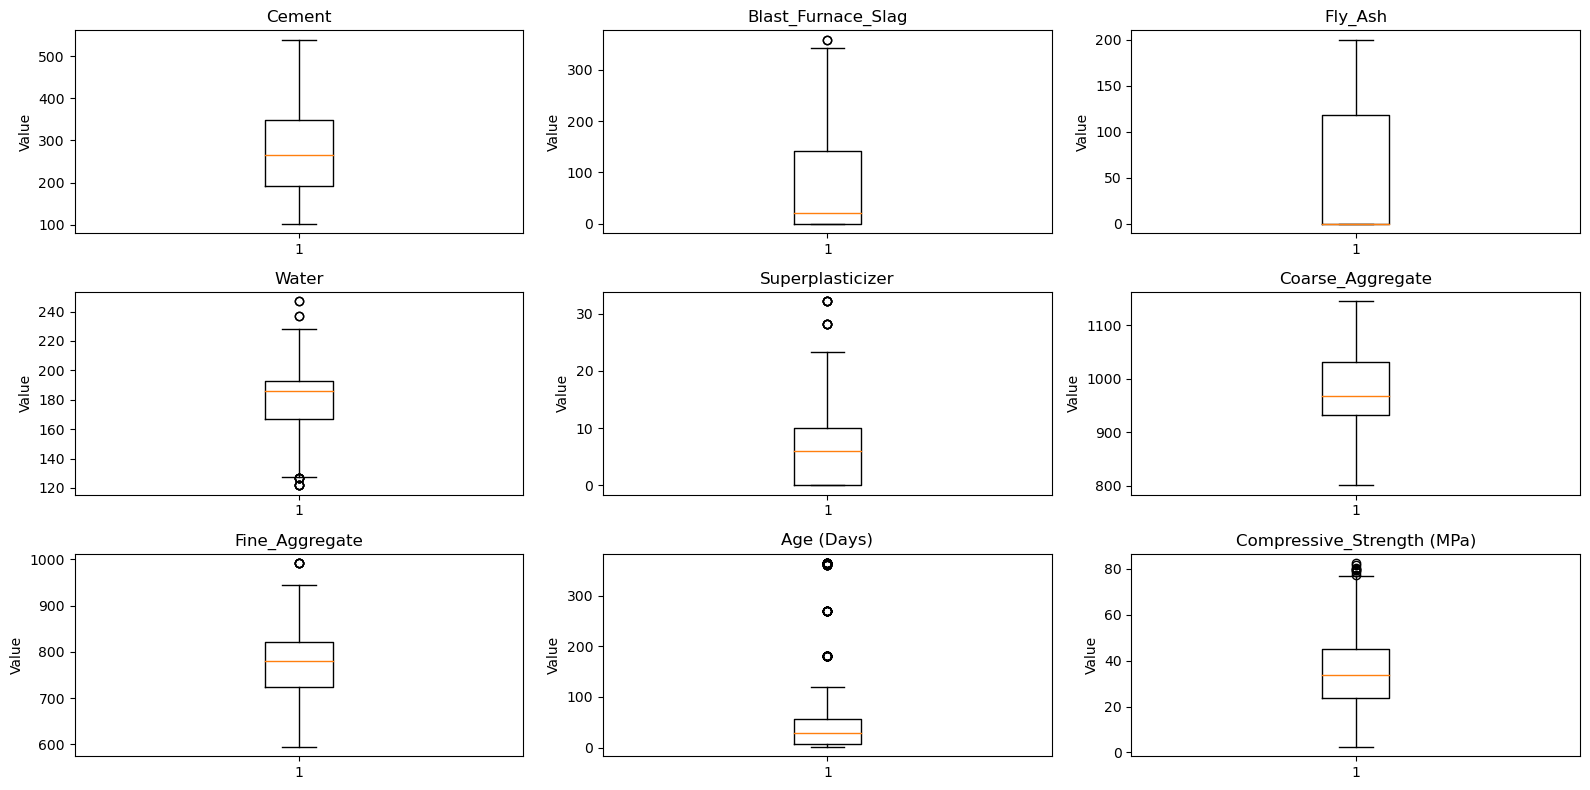

In [28]:
#make boxplots
make_boxplots(data, 3, 3, (16, 8))

not all features appear normally distributed and there are a few outliers. Will explore significance

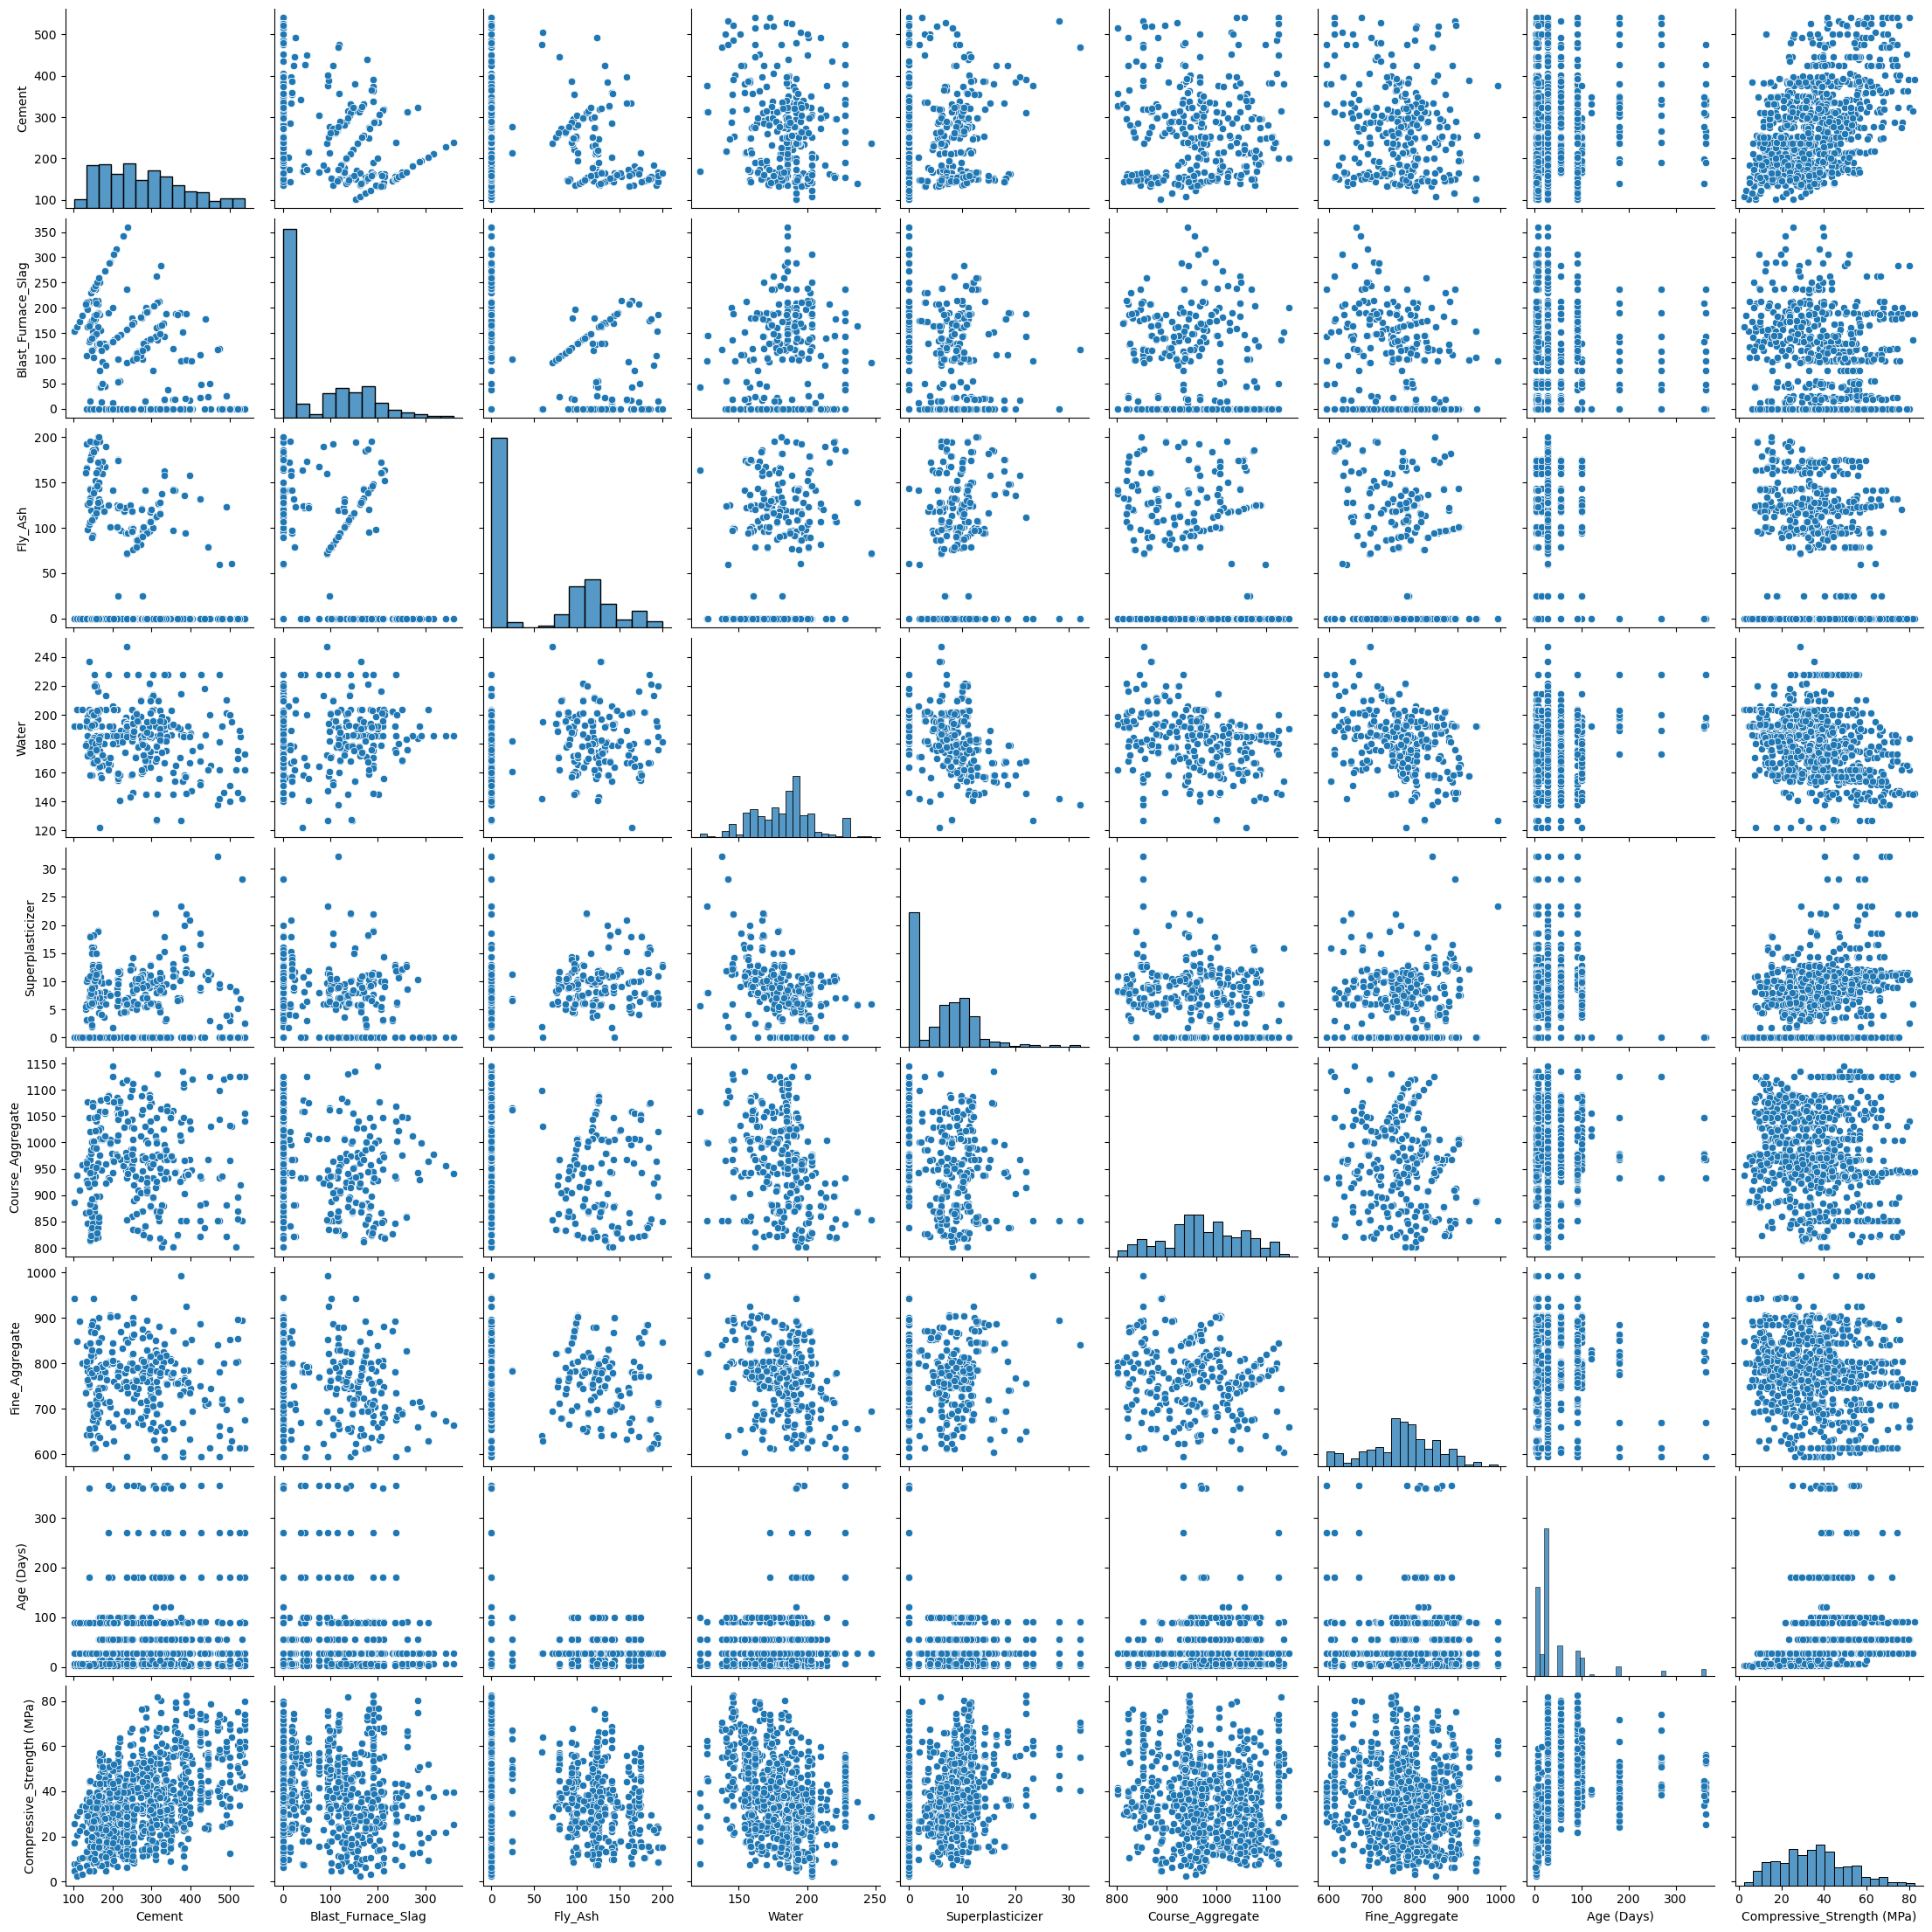

In [12]:
#pairplot
sns.pairplot(data)

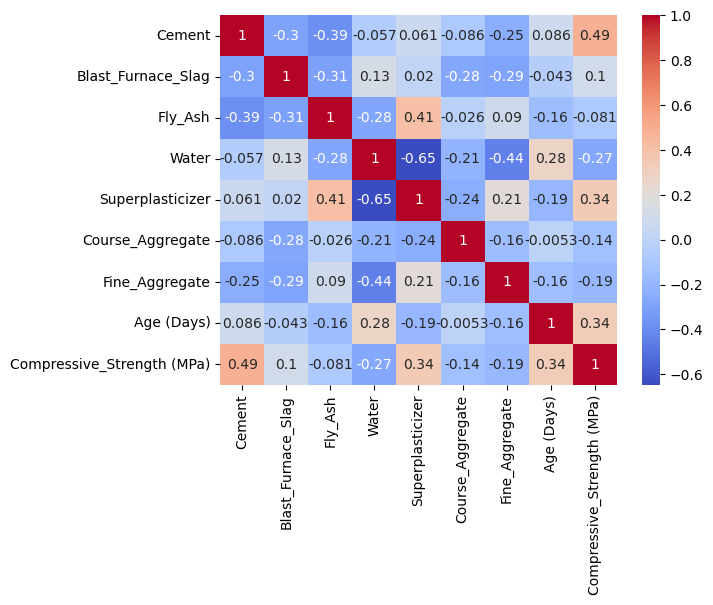

In [15]:
#heatmap
correlation = data.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

Target is Compressive_Strength:
- Cement has a mild positive correlation
- Blast_Furnace_Slag has a low positive correlation
- Fly_Ash can be ignored
- Water has a low negative correlation
- Superplastizer has a mild positive correlation
- Course_Aggregate has a low negative correlation
- Fine Aggregate has a low negative correlation
- Age has a mild positive correlation 

Consider binning the days and exploring components as % of total

# Outlier and Normalization Exploration

## Outliers

Features with outliers = Blast Furance Slag, Water, Superplasticizer, Fine Aggregate, and Age

In [7]:
#function to create multiple copies of df
def make_copies(dataframe, feature, num_copies):
    new_df = pd.concat([dataframe[feature]] * num_copies, axis=1)
    new_df.columns = ['Original', 'win1', 'win2', 'win3']
    return new_df

In [9]:
#make copies
blast_furnace = make_copies(data, 'Blast_Furnace_Slag', 4)
water = make_copies(data, 'Water', 4)
superplasticizer = make_copies(data, 'Superplasticizer', 4)
fine_aggregate = make_copies(data, 'Fine_Aggregate', 4)
age = make_copies(data, 'Age (Days)', 4)


In [10]:
#explore winsorization:
def winsorization(dataframe, lower_limit, upper_limit, axis=None):
    clipped = dataframe.clip(dataframe.quantile(lower_limit), dataframe.quantile(upper_limit), axis=axis)
    return clipped 

#plot boxplots for exploring outlier methods
def plot_boxplot(dataframe, title):
    fig, axs = plt.subplots(1, len(dataframe.columns), figsize=(20, 5))
    for i, col in enumerate(dataframe.columns):
        axs[i].boxplot(dataframe[col])
        axs[i].set_title(col)
    plt.suptitle(title)
    plt.show()

In [11]:
#winsorize for blast_furnace
blast_furnace['win1'] = winsorization(blast_furnace['win1'], lower_limit=0, upper_limit=0.99)
blast_furnace['win2'] = winsorization(blast_furnace['win2'], lower_limit=0, upper_limit=0.95)
blast_furnace['win3'] = winsorization(blast_furnace['win3'], lower_limit=0, upper_limit=0.90)

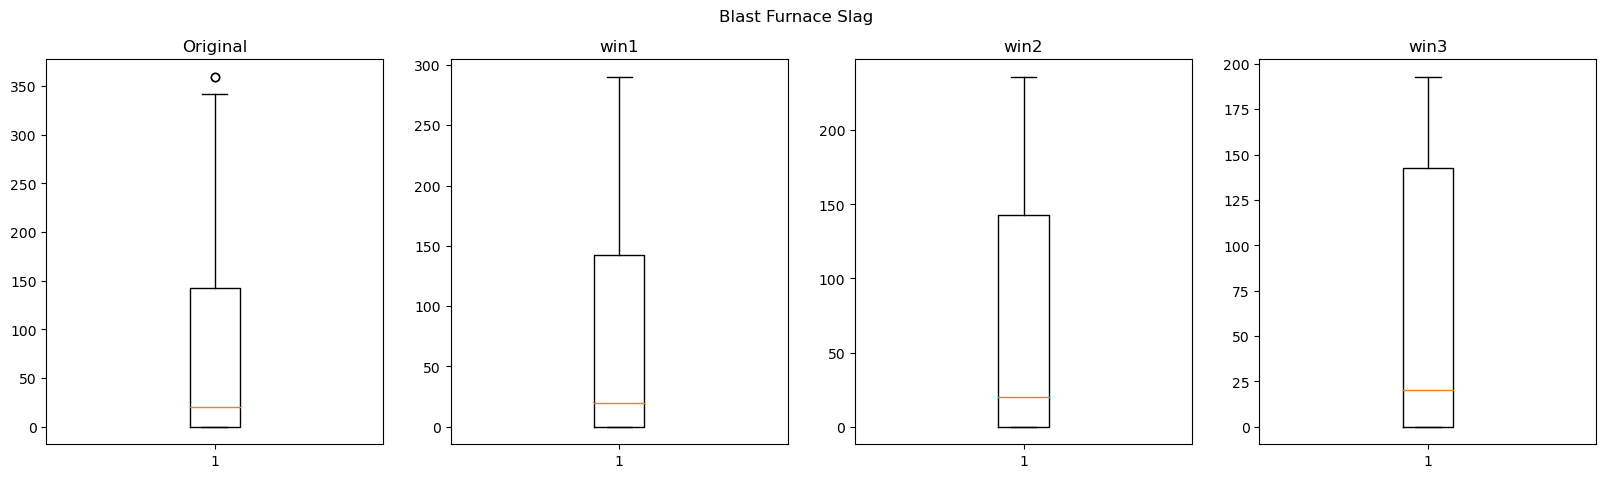

In [12]:
#plot boxplots
plot_boxplot(blast_furnace, 'Blast Furnace Slag')

In [16]:
#winsorize for water
water['win1'] = winsorization(water['win1'], lower_limit=0.01, upper_limit=0.99)
water['win2'] = winsorization(water['win2'], lower_limit=0.05, upper_limit=0.95)
water['win3'] = winsorization(water['win3'], lower_limit=0.1, upper_limit=0.90)

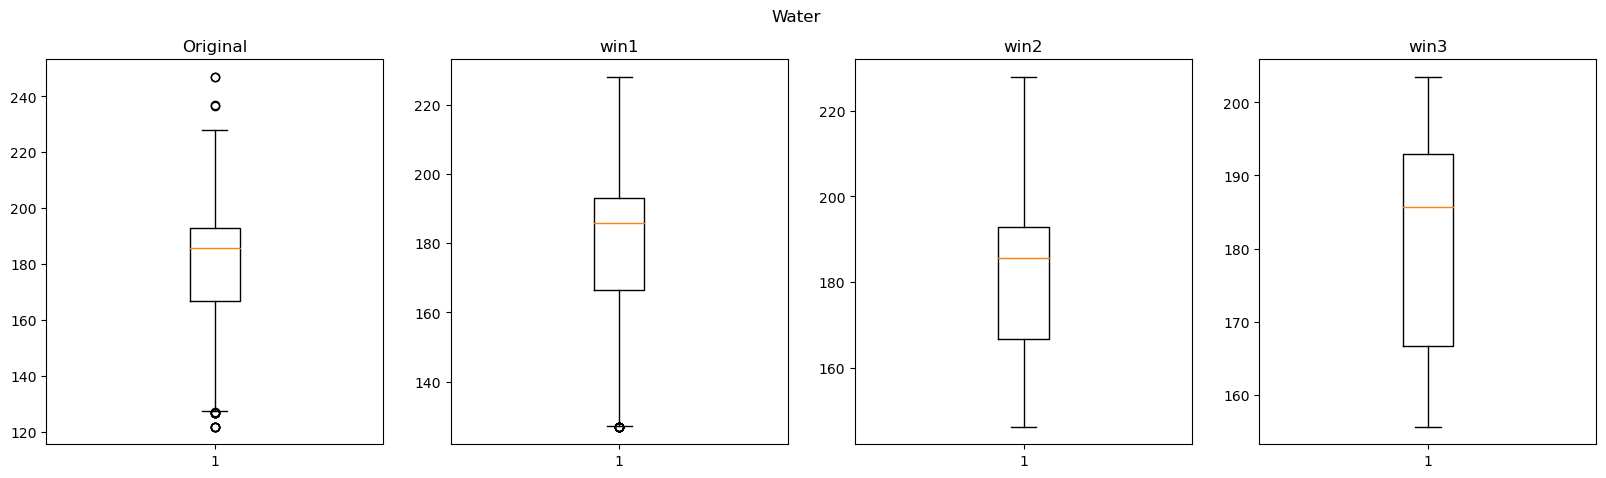

In [17]:
#plot boxplots
plot_boxplot(water, 'Water')

In [18]:
#winsorize for superplasticizer
superplasticizer['win1'] = winsorization(superplasticizer['win1'], lower_limit=0, upper_limit=0.99)
superplasticizer['win2'] = winsorization(superplasticizer['win2'], lower_limit=0, upper_limit=0.95)
superplasticizer['win3'] = winsorization(superplasticizer['win3'], lower_limit=0, upper_limit=0.90)

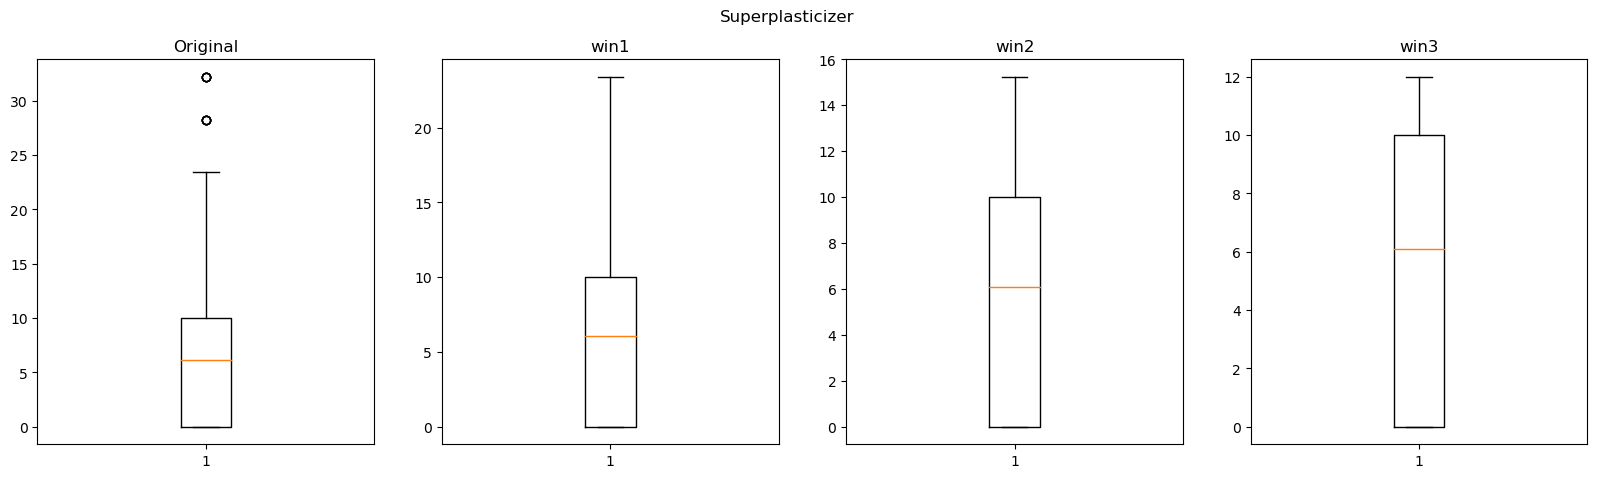

In [19]:
#plot boxplots
plot_boxplot(superplasticizer, 'Superplasticizer')

In [20]:
#winsorization for fine aggregate
fine_aggregate['win1'] = winsorization(fine_aggregate['win1'], lower_limit=0, upper_limit=0.99)
fine_aggregate['win2'] = winsorization(fine_aggregate['win2'], lower_limit=0, upper_limit=0.95)
fine_aggregate['win3'] = winsorization(fine_aggregate['win3'], lower_limit=0, upper_limit=0.90)

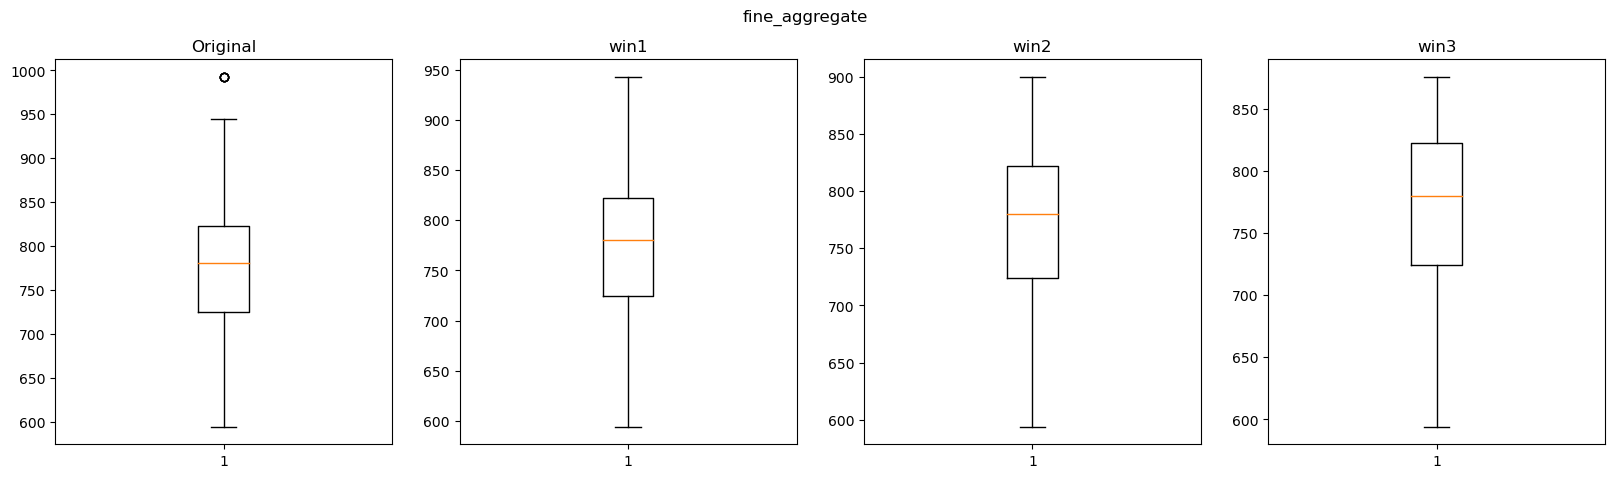

In [21]:
#plot boxplots
plot_boxplot(fine_aggregate, 'fine_aggregate')

In [22]:
#winsorize for age
age['win1'] = winsorization(age['win1'], lower_limit=0, upper_limit=0.99)
age['win2'] = winsorization(age['win2'], lower_limit=0, upper_limit=0.95)
age['win3'] = winsorization(age['win3'], lower_limit=0, upper_limit=0.90)

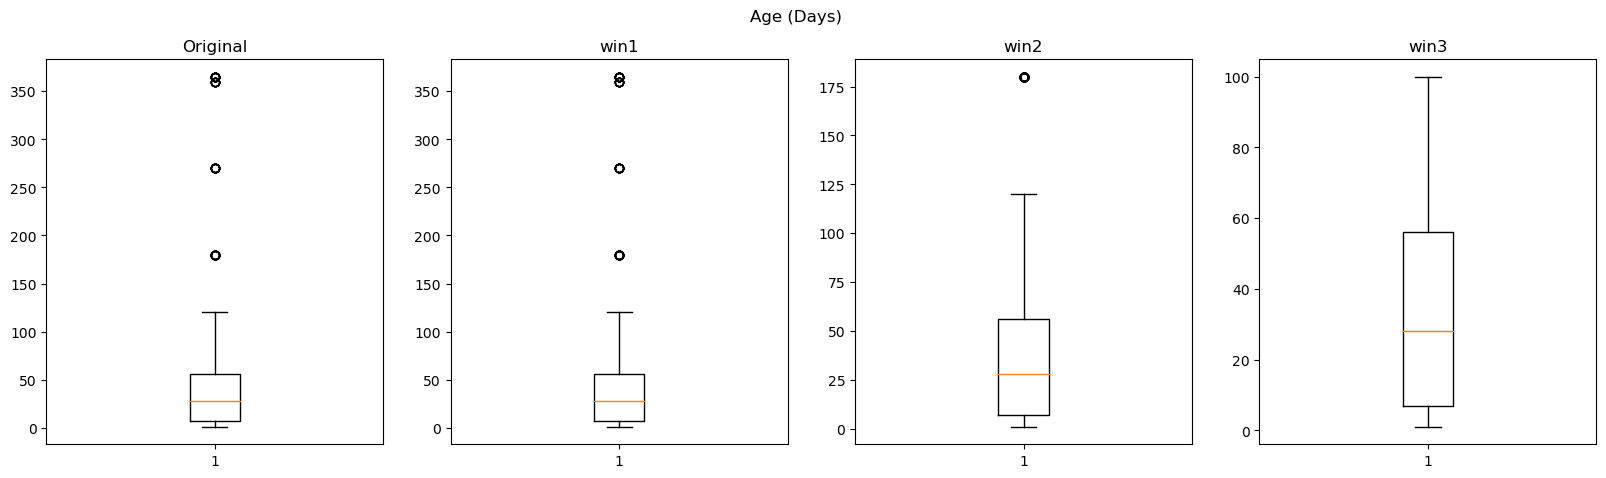

In [23]:
#plot boxplots
plot_boxplot(age, 'Age (Days)')

In [33]:
#compressive strength
strength = make_copies(data, 'Compressive_Strength (MPa)', 4)

#apply winsorization
strength['win1'] = winsorization(strength['win1'], lower_limit=0, upper_limit=0.99)
strength['win2'] = winsorization(strength['win2'], lower_limit=0, upper_limit=0.95)
strength['win3'] = winsorization(strength['win3'], lower_limit=0, upper_limit=0.90)

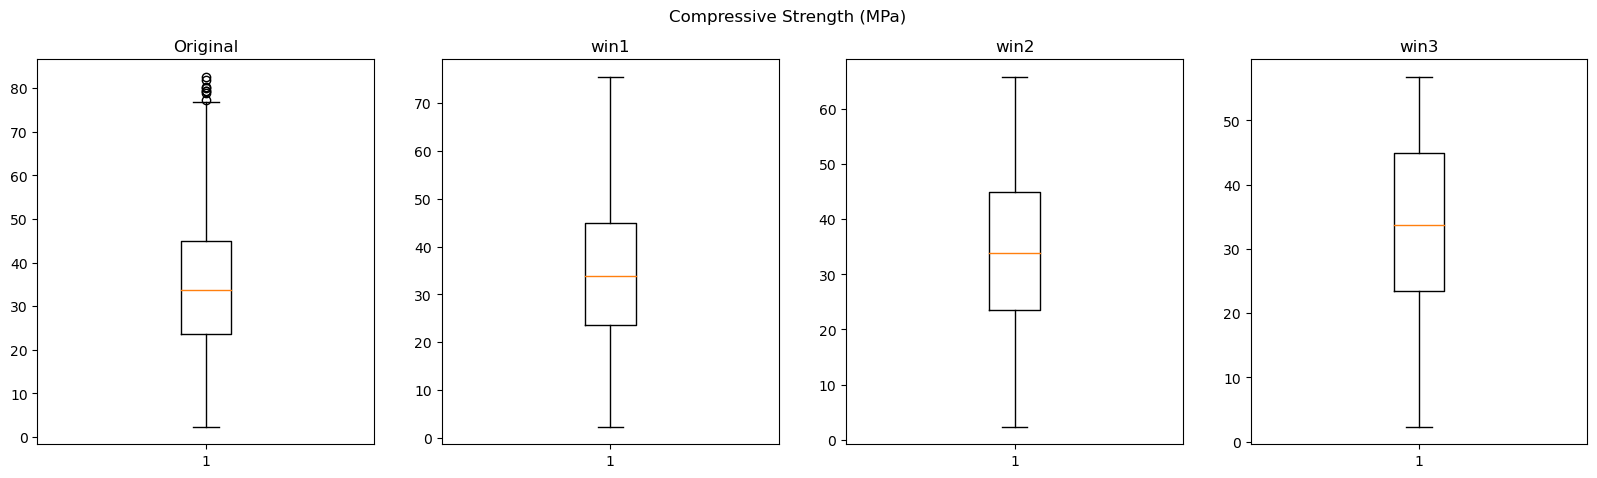

In [34]:
#make boxplots for compressive strength
plot_boxplot(strength, 'Compressive Strength (MPa)')

For the most part, Winsorization with a lower limit of 0 and a upper limit of 0.99 suffices, but Water requires a lower and upper limit of 0.05 and 0.95 respectively. Age (Days) is interesting in the sense that it requires a lower and upper limit of 0 and 0.9 respectively, the scatter plot does not indicate a clear or definitive relationship between Age and compressive strength. I may be able to drop it. 

## Normalization

In [8]:
# make copy of data and perform winsorization to select features
copy = data.copy()

In [11]:
#apply winsorization
win1_columns = ['Blast_Furnace_Slag', 'Superplasticizer', 'Fine_Aggregate', 'Compressive_Strength (MPa)'] #columns with lower and upper limits of 0 and 0.99 respectively
win2_columns = ['Water'] #columns with lower and upper limits of 0.05 and 0.95 respectively
win3_columns = ['Age (Days)'] #columns with lower and upper limits of 0 and 0.9 respectively


for column in copy.columns:
    if column in win1_columns:
        copy[column] = winsorization(copy[column], lower_limit=0, upper_limit=0.99, axis=None)
    elif column in win2_columns:
        copy[column] = winsorization(copy[column], lower_limit=0.05, upper_limit=0.95, axis=None)
    elif column in win3_columns:
        copy[column] = winsorization(copy[column], lower_limit=0.1, upper_limit=0.9, axis=None)
    else:
        pass


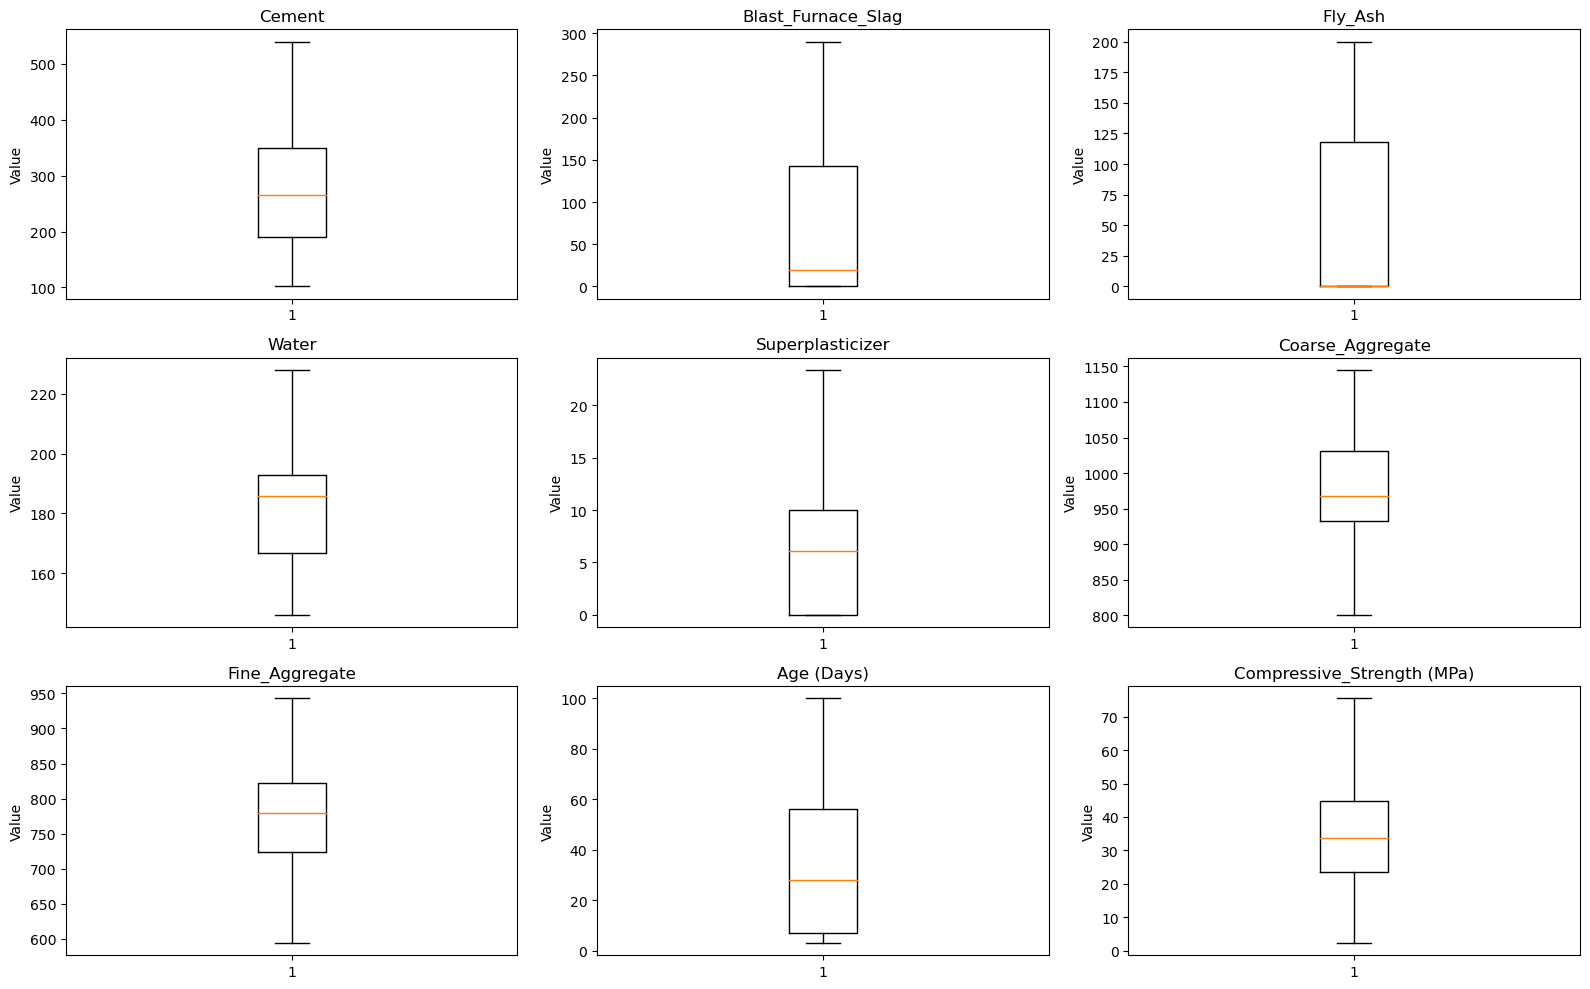

In [44]:
#plot box plots to check for outliers again
make_boxplots(copy, 3, 3, (16, 10))

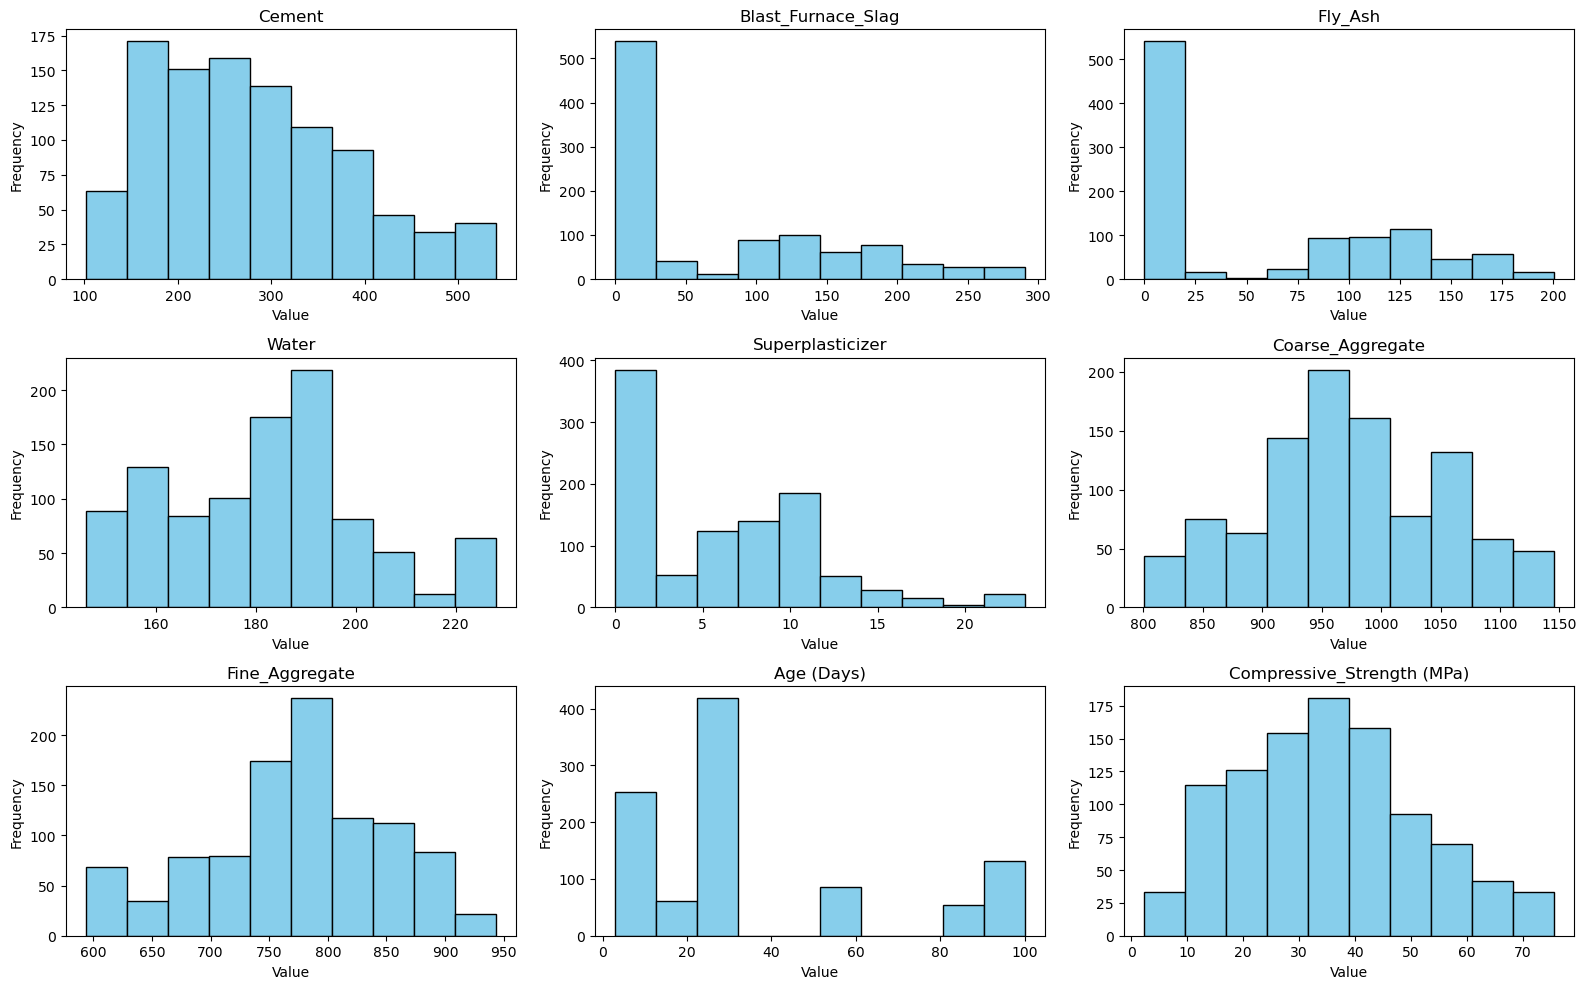

In [45]:
#let's look at the histograms now that we handled outliers our data
make_histogram(copy, 3, 3, (16, 10))

Need to assess which features are normalish and which arent - Shaprio wilks, Andersopn darling, Q-Q test too - better cause it compares to normal distrbution

From earlier Shapiro Wilk and Q-Q plots, we know our data deviates from the normal distribution, next will explore a few normalization techniques and determine which one is best for each feature.

In [13]:
#explore z-score, powertransfomer (yeo-johnson), and quantile transformer

# make copies for features 

cement_copy = make_copies(copy, 'Cement', 4)
blast_copy = make_copies(copy, 'Blast_Furnace_Slag', 4)
fly_copy = make_copies(copy, 'Fly_Ash', 4)
water_copy = make_copies(copy, 'Water', 4)
superplasticizer_copy = make_copies(copy, 'Superplasticizer', 4)
coarse_copy = make_copies(copy, 'Coarse_Aggregate', 4)
fine_copy = make_copies(copy, 'Fine_Aggregate', 4)
age_copy = make_copies(copy, 'Age (Days)', 4)
strength_copy = make_copies(copy, 'Compressive_Strength (MPa)', 4)


In [15]:
#apply new column names
var_names = [cement_copy, blast_copy, fly_copy, water_copy, superplasticizer_copy, coarse_copy, fine_copy, age_copy, strength_copy]

#change column names
for df in var_names:
    df.columns = ['Original', 'Z_score', 'Yeo-Johnson', 'Quantile-Transformation']

In [16]:
#import necessary libraries
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

#scipy.stats imported earlier

In [38]:
# functions to perform z_score, Yeo-Johnson, and Quantile Transformation
def z_score_transformation(dataframe, feature):
    updated_feature = stats.zscore(dataframe[feature])
    return updated_feature

def yeo_johnson(dataframe, feature):
    pt = PowerTransformer(method='yeo-johnson')
    reshaped_feature = dataframe[feature].values.reshape(-1, 1)
    updated_feature = pt.fit_transform(reshaped_feature)
    return updated_feature

def quantile_transformation(dataframe, feature):
    qt = QuantileTransformer(output_distribution='normal')
    reshaped_feature = dataframe[feature].values.reshape(-1, 1)
    updated_feature = qt.fit_transform(reshaped_feature)
    return updated_feature

#plot histograms for exploring outlier methods
def plot_histogram(dataframe, title):
    fig, axs = plt.subplots(1, len(dataframe.columns), figsize=(20, 5))
    for i, col in enumerate(dataframe.columns):
        axs[i].hist(dataframe[col])
        axs[i].set_title(col)
    plt.suptitle(title)
    plt.show()

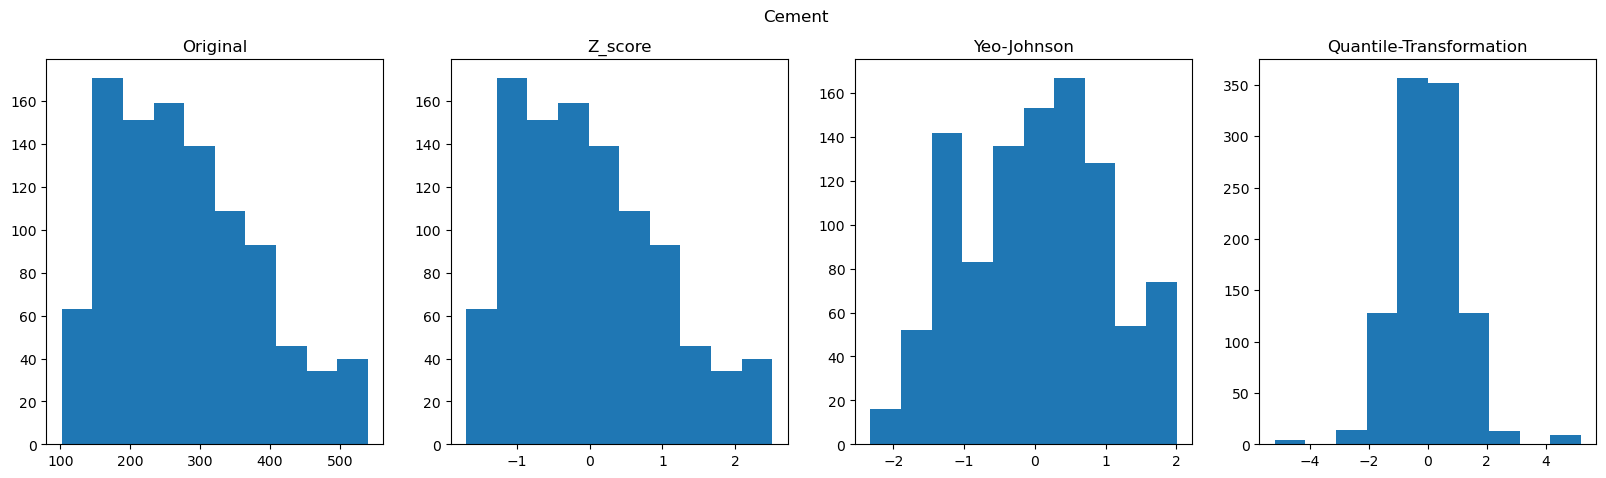

In [39]:
#Cement
cement_copy['Z_score'] = z_score_transformation(cement_copy, 'Z_score')
cement_copy['Yeo-Johnson'] = yeo_johnson(cement_copy, 'Yeo-Johnson')
cement_copy['Quantile-Transformation'] = quantile_transformation(cement_copy, 'Quantile-Transformation')

#plot histogram
plot_histogram(cement_copy, 'Cement')

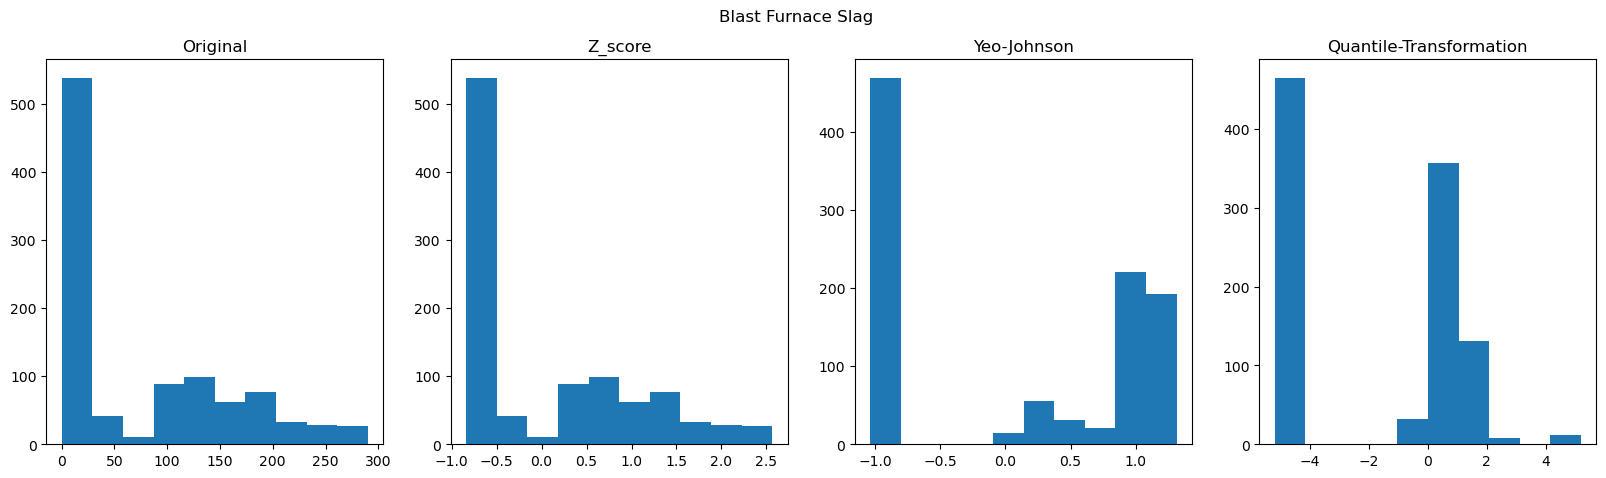

In [40]:
#Blast Furnace
blast_copy['Z_score'] = z_score_transformation(blast_copy, 'Z_score')
blast_copy['Yeo-Johnson'] = yeo_johnson(blast_copy, 'Yeo-Johnson')
blast_copy['Quantile-Transformation'] = quantile_transformation(blast_copy, 'Quantile-Transformation')

#plot histogram
plot_histogram(blast_copy, 'Blast Furnace Slag')

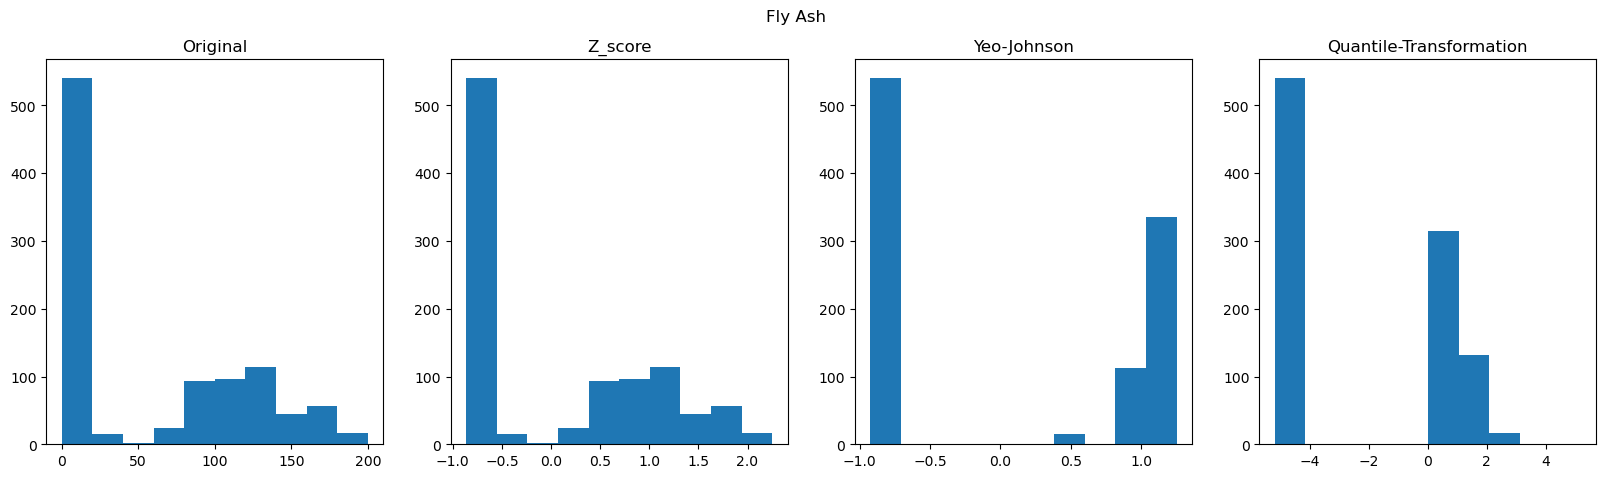

In [41]:
#Fly Ash
fly_copy['Z_score'] = z_score_transformation(fly_copy, 'Z_score')
fly_copy['Yeo-Johnson'] = yeo_johnson(fly_copy, 'Yeo-Johnson')
fly_copy['Quantile-Transformation'] = quantile_transformation(fly_copy, 'Quantile-Transformation')

#plot histogram
plot_histogram(fly_copy, 'Fly Ash')

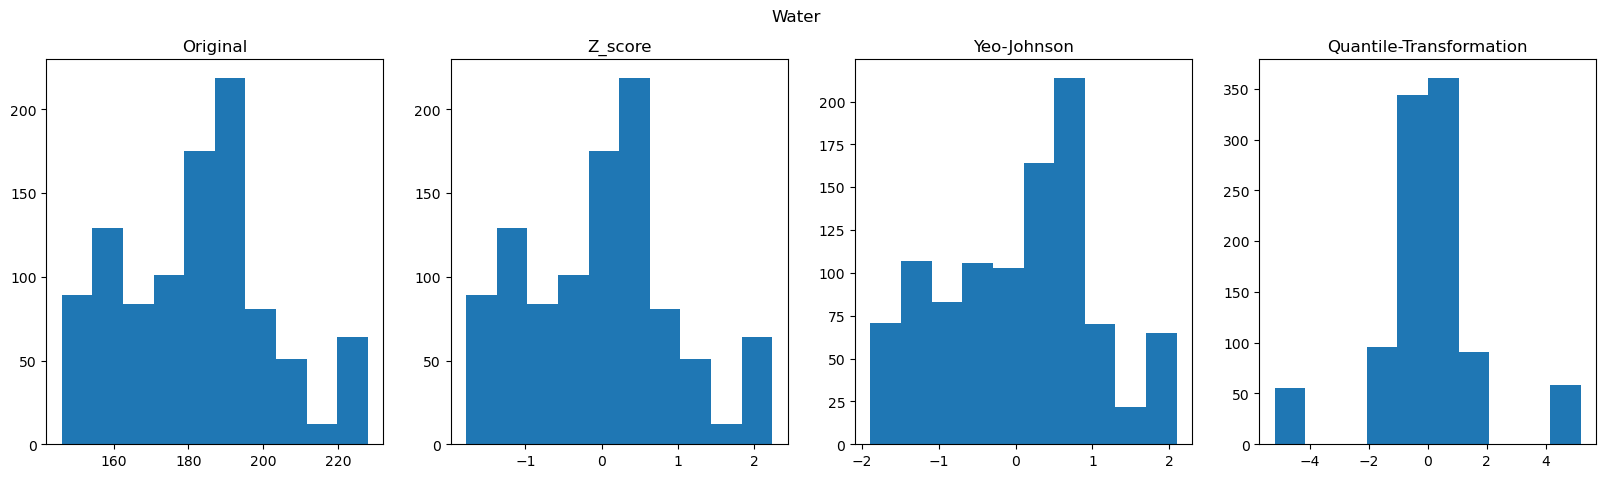

In [42]:
#Water
water_copy['Z_score'] = z_score_transformation(water_copy, 'Z_score')
water_copy['Yeo-Johnson'] = yeo_johnson(water_copy, 'Yeo-Johnson')
water_copy['Quantile-Transformation'] = quantile_transformation(water_copy, 'Quantile-Transformation')

#plot histogram
plot_histogram(water_copy, 'Water')

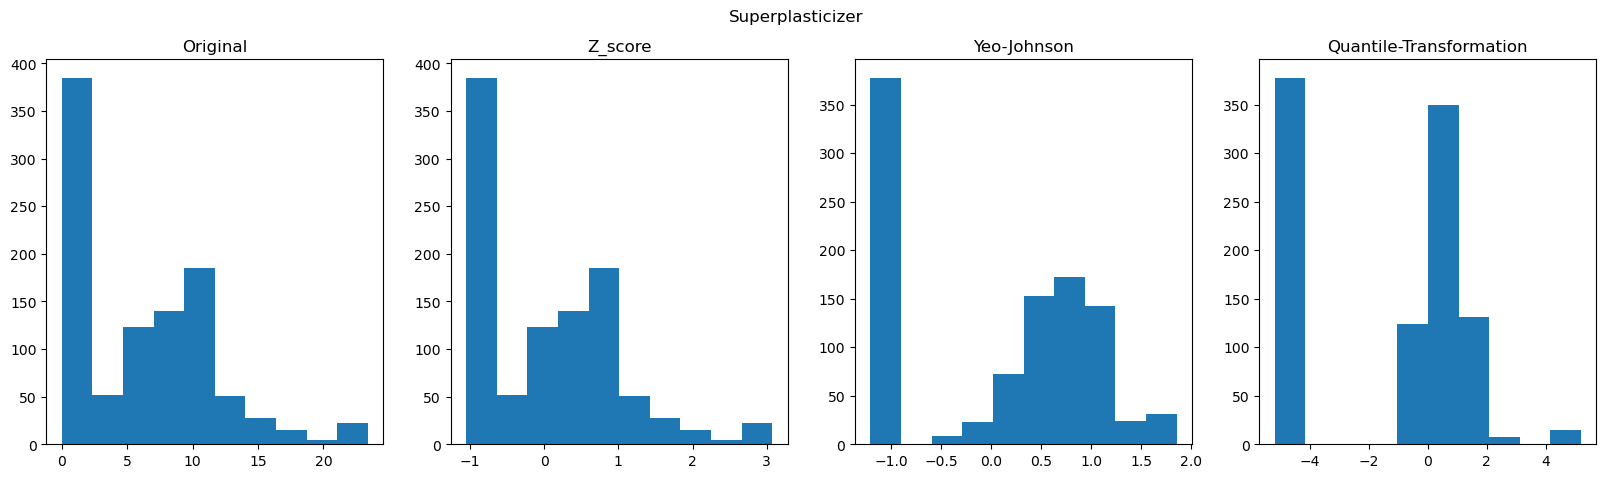

In [43]:
#Superplasticizer
superplasticizer_copy['Z_score'] = z_score_transformation(superplasticizer_copy, 'Z_score')
superplasticizer_copy['Yeo-Johnson'] = yeo_johnson(superplasticizer_copy, 'Yeo-Johnson')
superplasticizer_copy['Quantile-Transformation'] = quantile_transformation(superplasticizer_copy, 'Quantile-Transformation')

#plot histogram
plot_histogram(superplasticizer_copy, 'Superplasticizer')

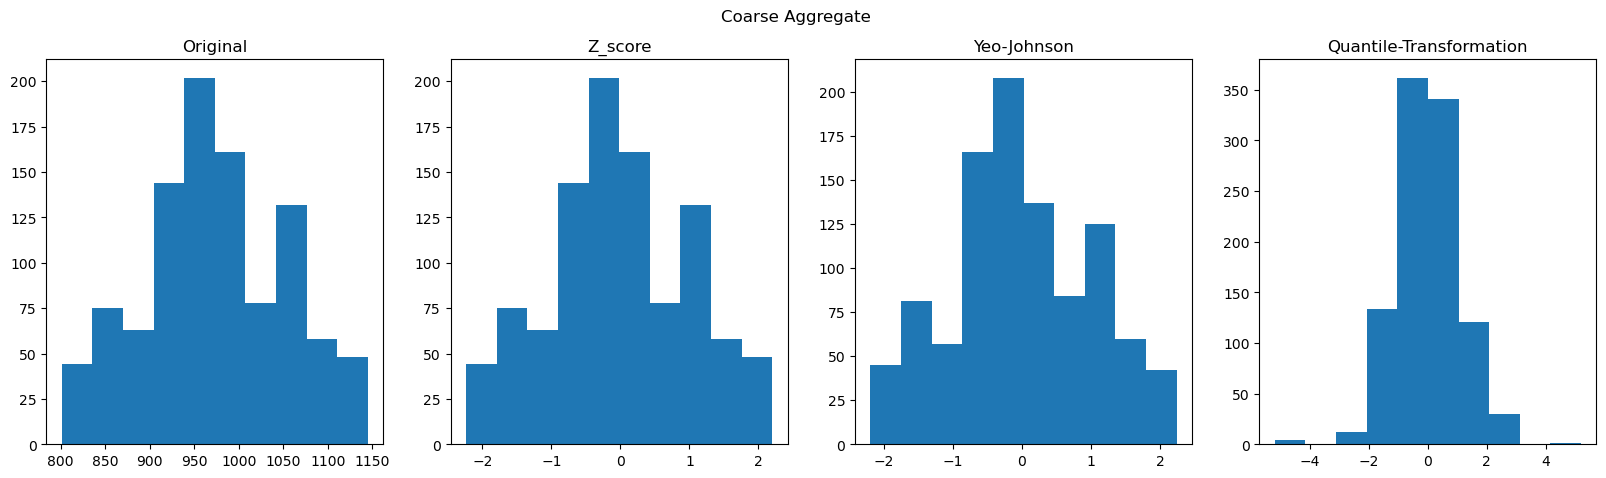

In [44]:
#Coarse Aggregate
coarse_copy['Z_score'] = z_score_transformation(coarse_copy, 'Z_score')
coarse_copy['Yeo-Johnson'] = yeo_johnson(coarse_copy, 'Yeo-Johnson')
coarse_copy['Quantile-Transformation'] = quantile_transformation(coarse_copy, 'Quantile-Transformation')

#plot histogram
plot_histogram(coarse_copy, 'Coarse Aggregate')

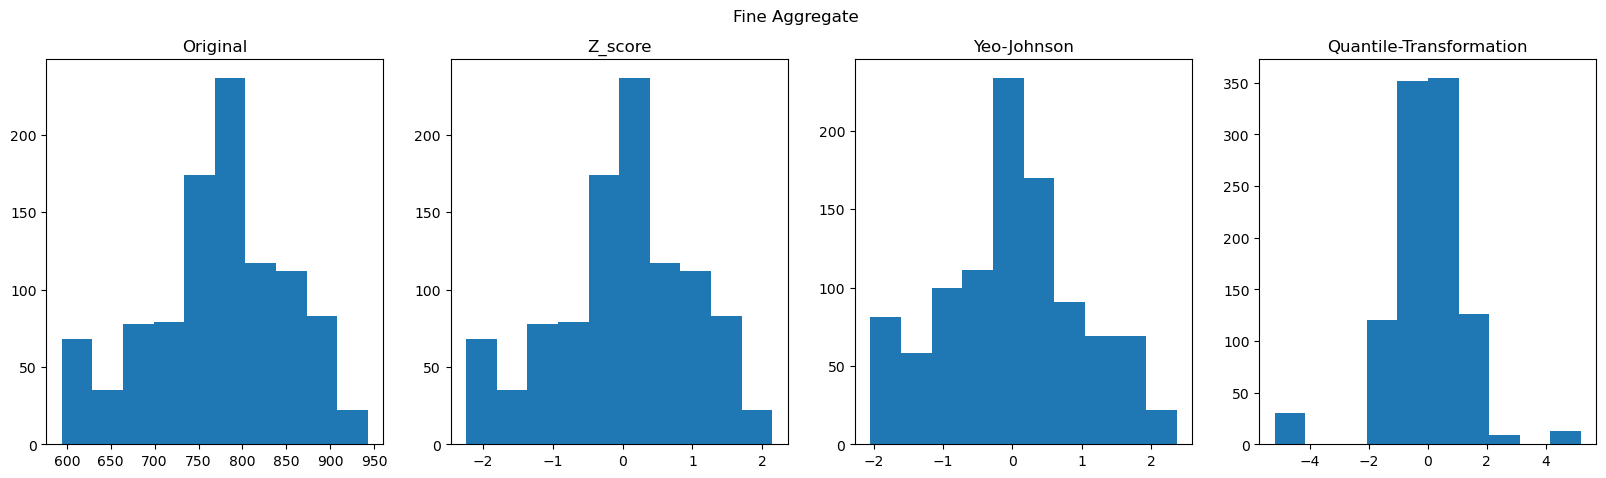

In [45]:
# Fine Aggregate
fine_copy['Z_score'] = z_score_transformation(fine_copy, 'Z_score')
fine_copy['Yeo-Johnson'] = yeo_johnson(fine_copy, 'Yeo-Johnson')
fine_copy['Quantile-Transformation'] = quantile_transformation(fine_copy, 'Quantile-Transformation')

#plot histogram
plot_histogram(fine_copy, 'Fine Aggregate')

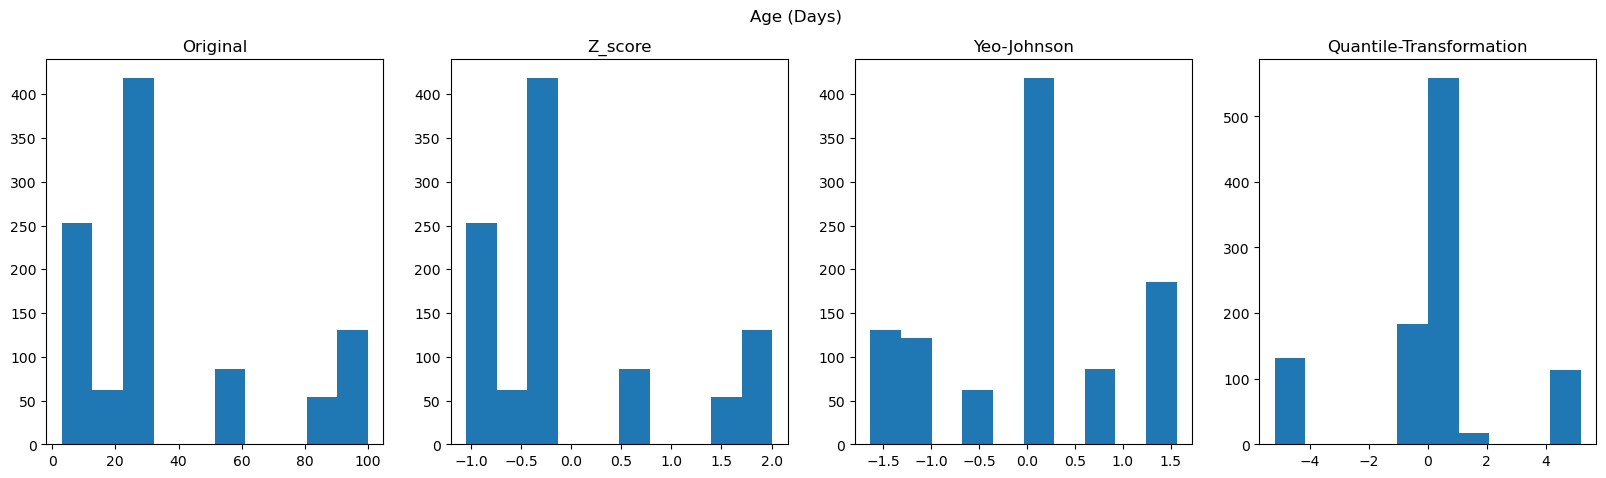

In [46]:
# Age
age_copy['Z_score'] = z_score_transformation(age_copy, 'Z_score')
age_copy['Yeo-Johnson'] = yeo_johnson(age_copy, 'Yeo-Johnson')
age_copy['Quantile-Transformation'] = quantile_transformation(age_copy, 'Quantile-Transformation')

#plot histogram
plot_histogram(age_copy, 'Age (Days)')

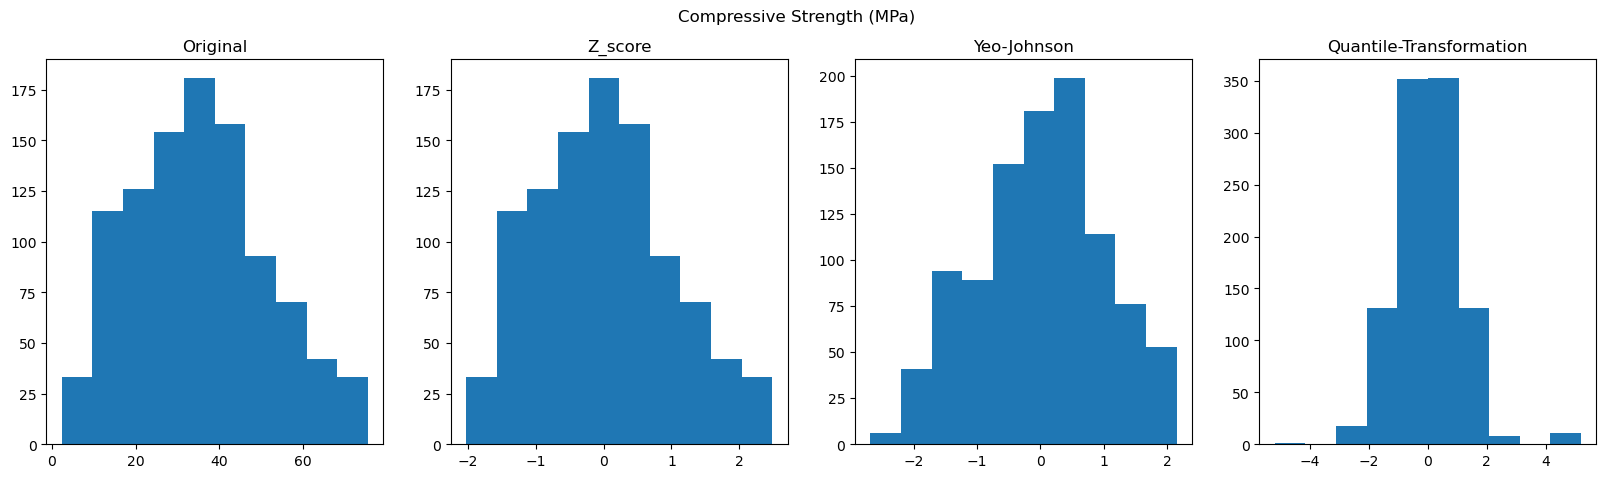

In [47]:
# Compressive Strength
strength_copy['Z_score'] = z_score_transformation(strength_copy, 'Z_score')
strength_copy['Yeo-Johnson'] = yeo_johnson(strength_copy, 'Yeo-Johnson')
strength_copy['Quantile-Transformation'] = quantile_transformation(strength_copy, 'Quantile-Transformation')

#plot histogram
plot_histogram(strength_copy, 'Compressive Strength (MPa)')

Yeo-johnson and Quantile transformation appear to work best, but quantile transformation appears more consistent. 
There appears to be no linearity with any of the inputs, but practice EDA is always good. 
I am going to explore non-linear models like random forest and eventually neural networks.